In [ ]:
import torch
from mnist import MNIST
import numpy as np
from scipy import linalg
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
mndata = MNIST('./data/')
x_train, y_train = map(np.array, mndata.load_training())
x_test, y_test = map(np.array, mndata.load_testing())
x_train = torch.FloatTensor(x_train/255.0)
y_train = torch.tensor(y_train)
x_test = torch.FloatTensor(x_test/255.0)
y_test = torch.tensor(y_test)

In [ ]:
def one_hot(labels):
    k = labels.max() + 1
    return torch.tensor([np.eye(k)[i] for i in labels])
    

In [ ]:
def cal_accuracy(W,x,y):
    y_hat = torch.matmul(x, W)
    y_hat_label = torch.argmax(y_hat, axis=1)
    acc = float(torch.sum(y_hat_label == y)) / float(x.shape[0])
    return acc

In [ ]:
# softmax
def fit_gd_cross_entropy(x_train,y_train,x_test,y_test,eta=0.1, delta = 1e-4):
    W = torch.zeros(784, 10, requires_grad=True)
    converged = False
    loss_prev = 0
    d_loss = 1
    loss = 1
    train_accuracy = []
    test_accuracy = []
    i = 0
    while d_loss > delta:
        i = i+1
        y_hat = torch.matmul(x_train, W)
        loss = torch.nn.functional.cross_entropy(y_hat, y_train.long())
        d_loss = abs(loss -loss_prev)
        loss_prev = loss
        loss.backward()
        W.data = W.data - eta * W.grad
        train_accuracy.append(cal_accuracy(W,x_train,y_train))
        test_accuracy.append(cal_accuracy(W,x_test,y_test))
        W.grad.zero_()
        
    return W,train_accuracy,test_accuracy,i
        #print(loss.data)
        

In [ ]:
#y_train
W,train_accuracy,test_accuracy,i = fit_gd_cross_entropy(x_train,y_train,x_test,y_test,eta=0.05, delta=0.001)

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(1,i+1), y=train_accuracy, ax=ax, label="Training data")
sns.lineplot(x=range(1,i+1), y=test_accuracy, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
#plt.savefig("B4c1.png")
'''
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(0,i), y = train_mislabeled_error, ax=ax, label="Training data")
sns.lineplot(x=range(0,i), y = test_mislabeled_error, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iterations")
ax.set_ylabel("mislabeled_error")
plt.savefig("A62b.png")
'''

In [ ]:
test_accuracy[-1]

In [ ]:
train_accuracy

In [1]:
import torch
from mnist import MNIST
import numpy as np
from scipy import linalg
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
mndata = MNIST('./data/')
x_train, y_train = map(np.array, mndata.load_training())
x_test, y_test = map(np.array, mndata.load_testing())
x_train = torch.FloatTensor(x_train/255.0)
y_train = torch.tensor(y_train)
x_test = torch.FloatTensor(x_test/255.0)
y_test = torch.tensor(y_test)

In [2]:
def one_hot(labels):
    k = labels.max() + 1
    return torch.tensor([np.eye(k)[i] for i in labels])

In [3]:
def cal_accuracy(W,x,y):
    y_hat = torch.matmul(x, W)
    y_hat_label = torch.argmax(y_hat, axis=1)
    acc = float(torch.sum(y_hat_label == y)) / float(x.shape[0])
    return acc

In [8]:
# softmax
def fit_gd_cross_entropy(x_train,y_train,x_test,y_test,eta=0.05, delta = 1e-4):
    W = torch.zeros(784, 10, requires_grad=True)
    converged = False
    loss_prev = 0
    d_loss = 1
    loss = 1
    train_accuracy = []
    test_accuracy = []
    i = 0
    while d_loss > delta:
        i = i+1
        y_hat = torch.matmul(x_train, W)
        y_train_oh = one_hot(y_train)
        loss = torch.nn.functional.mse_loss(y_hat, y_train_oh.float())
        d_loss = abs(loss -loss_prev)
        loss_prev = loss
        loss.backward()
        W.data = W.data - eta * W.grad
        train_accuracy.append(cal_accuracy(W,x_train,y_train))
        test_accuracy.append(cal_accuracy(W,x_test,y_test))
        W.grad.zero_()
        print(loss.data)
    return W,train_accuracy,test_accuracy,i
        
        

In [13]:
W,train_accuracy,test_accuracy,i = fit_gd_cross_entropy(x_train,y_train,x_test,y_test,eta=0.1, delta=0.00005)

tensor(0.1000)
tensor(0.0872)
tensor(0.0832)
tensor(0.0800)
tensor(0.0773)
tensor(0.0748)
tensor(0.0726)
tensor(0.0707)
tensor(0.0689)
tensor(0.0673)
tensor(0.0659)
tensor(0.0647)
tensor(0.0635)
tensor(0.0624)
tensor(0.0615)
tensor(0.0606)
tensor(0.0598)
tensor(0.0590)
tensor(0.0584)
tensor(0.0577)
tensor(0.0572)
tensor(0.0566)
tensor(0.0561)
tensor(0.0556)
tensor(0.0552)
tensor(0.0548)
tensor(0.0544)
tensor(0.0540)
tensor(0.0537)
tensor(0.0534)
tensor(0.0531)
tensor(0.0528)
tensor(0.0525)
tensor(0.0522)
tensor(0.0520)
tensor(0.0517)
tensor(0.0515)
tensor(0.0513)
tensor(0.0511)
tensor(0.0509)
tensor(0.0507)
tensor(0.0505)
tensor(0.0503)
tensor(0.0502)
tensor(0.0500)
tensor(0.0498)
tensor(0.0497)
tensor(0.0496)
tensor(0.0494)
tensor(0.0493)
tensor(0.0491)
tensor(0.0490)
tensor(0.0489)
tensor(0.0488)
tensor(0.0487)
tensor(0.0486)
tensor(0.0484)
tensor(0.0483)
tensor(0.0482)
tensor(0.0481)
tensor(0.0480)
tensor(0.0480)
tensor(0.0479)
tensor(0.0478)
tensor(0.0477)
tensor(0.0476)
tensor(0.0

Text(0, 0.5, 'Accuracy')

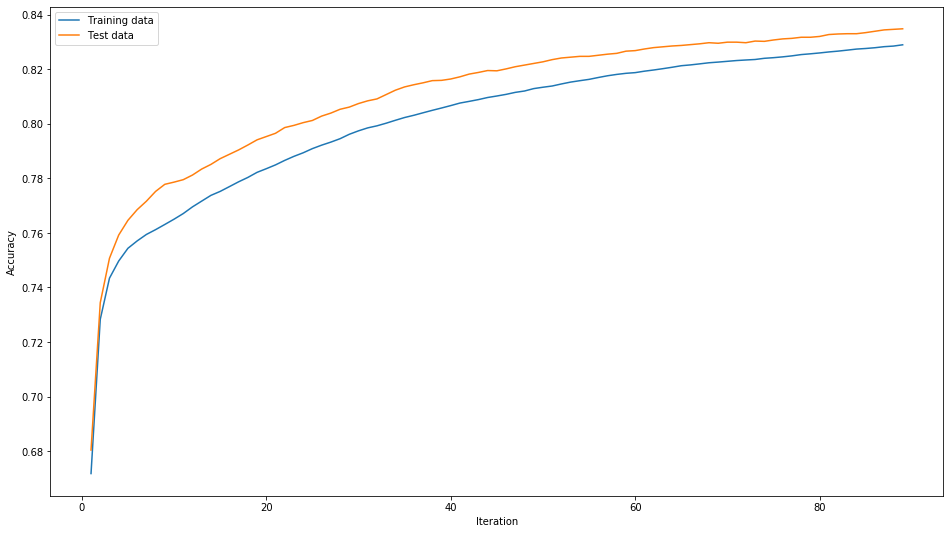

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x=range(1,i+1), y=train_accuracy, ax=ax, label="Training data")
sns.lineplot(x=range(1,i+1), y=test_accuracy, ax=ax, label="Test data")
plt.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
#plt.savefig("B4c2.png")

In [17]:
train_accuracy[-1]

0.8289333333333333